Files already downloaded and verified
Files already downloaded and verified


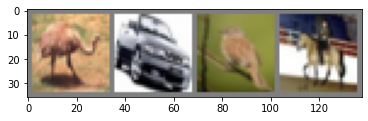

bird  car   bird  horse


In [37]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

CNN

In [38]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [39]:


def acc(n,testloader):

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = n(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    return correct/total

accCNN= [] 
acc0H= []
acc1H= []
acc2H= []
acc3H= []
acc4H= []

In [40]:

net = Net()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    accCNN.append(acc(net,testloader))
    print(accCNN)
print('Finished Training')

[1,  2000] loss: 2.193
[1,  4000] loss: 1.882
[1,  6000] loss: 1.667
[1,  8000] loss: 1.580
[1, 10000] loss: 1.504
[1, 12000] loss: 1.436
Accuracy of the network on the 10000 test images: 48 %
[0.4817]
[2,  2000] loss: 1.374
[2,  4000] loss: 1.368
[2,  6000] loss: 1.344
[2,  8000] loss: 1.305
[2, 10000] loss: 1.279
[2, 12000] loss: 1.274
Accuracy of the network on the 10000 test images: 53 %
[0.4817, 0.5335]
[3,  2000] loss: 1.194
[3,  4000] loss: 1.212
[3,  6000] loss: 1.213
[3,  8000] loss: 1.183
[3, 10000] loss: 1.165
[3, 12000] loss: 1.154
Accuracy of the network on the 10000 test images: 58 %
[0.4817, 0.5335, 0.5878]
[4,  2000] loss: 1.091
[4,  4000] loss: 1.118
[4,  6000] loss: 1.107
[4,  8000] loss: 1.117
[4, 10000] loss: 1.098
[4, 12000] loss: 1.089
Accuracy of the network on the 10000 test images: 58 %
[0.4817, 0.5335, 0.5878, 0.5892]
[5,  2000] loss: 0.998
[5,  4000] loss: 1.034
[5,  6000] loss: 1.044
[5,  8000] loss: 1.045
[5, 10000] loss: 1.037
[5, 12000] loss: 1.030
Accura

In [58]:
#NN 0,1,2,3,4


class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 512)
        self.fc2= nn.Linear(512,10)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):

        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x)

        return x




In [59]:
net1 = Net1()
import torch.optim as optim
acc1H=[]
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    acc1H.append(acc(net1,testloader))
    print(acc1H)
print('Finished Training')

[1,  2000] loss: 1.830
[1,  4000] loss: 1.700
[1,  6000] loss: 1.626
[1,  8000] loss: 1.606
[1, 10000] loss: 1.569
[1, 12000] loss: 1.574
Accuracy of the network on the 10000 test images: 45 %
[0.4597]
[2,  2000] loss: 1.488
[2,  4000] loss: 1.487
[2,  6000] loss: 1.471
[2,  8000] loss: 1.501
[2, 10000] loss: 1.463
[2, 12000] loss: 1.453
Accuracy of the network on the 10000 test images: 48 %
[0.4597, 0.4844]
[3,  2000] loss: 1.378
[3,  4000] loss: 1.386
[3,  6000] loss: 1.433
[3,  8000] loss: 1.400
[3, 10000] loss: 1.397
[3, 12000] loss: 1.396
Accuracy of the network on the 10000 test images: 49 %
[0.4597, 0.4844, 0.4951]
[4,  2000] loss: 1.284
[4,  4000] loss: 1.316
[4,  6000] loss: 1.381
[4,  8000] loss: 1.326
[4, 10000] loss: 1.369
[4, 12000] loss: 1.366
Accuracy of the network on the 10000 test images: 48 %
[0.4597, 0.4844, 0.4951, 0.4825]
[5,  2000] loss: 1.267
[5,  4000] loss: 1.286
[5,  6000] loss: 1.269
[5,  8000] loss: 1.320
[5, 10000] loss: 1.309
[5, 12000] loss: 1.298
Accura

In [60]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 512)
        self.fc2= nn.Linear(512,512)
        self.fc3 = nn.Linear(512,10)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):

        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x=self.dropout(x)
        x= F.relu(self.fc2(x))
        
        x = self.fc3(x)

        return x

In [61]:
net2 = Net2()
import torch.optim as optim
acc2H=[]
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    acc2H.append(acc(net2,testloader))
    print(acc2H)
print('Finished Training')

[1,  2000] loss: 1.964
[1,  4000] loss: 1.792
[1,  6000] loss: 1.734
[1,  8000] loss: 1.691
[1, 10000] loss: 1.678
[1, 12000] loss: 1.659
Accuracy of the network on the 10000 test images: 41 %
[0.4186]
[2,  2000] loss: 1.614
[2,  4000] loss: 1.583
[2,  6000] loss: 1.598
[2,  8000] loss: 1.574
[2, 10000] loss: 1.556
[2, 12000] loss: 1.587
Accuracy of the network on the 10000 test images: 43 %
[0.4186, 0.4385]
[3,  2000] loss: 1.519
[3,  4000] loss: 1.533
[3,  6000] loss: 1.524
[3,  8000] loss: 1.495
[3, 10000] loss: 1.507
[3, 12000] loss: 1.507
Accuracy of the network on the 10000 test images: 45 %
[0.4186, 0.4385, 0.459]
[4,  2000] loss: 1.467
[4,  4000] loss: 1.482
[4,  6000] loss: 1.466
[4,  8000] loss: 1.471
[4, 10000] loss: 1.462
[4, 12000] loss: 1.463
Accuracy of the network on the 10000 test images: 46 %
[0.4186, 0.4385, 0.459, 0.4661]
[5,  2000] loss: 1.421
[5,  4000] loss: 1.442
[5,  6000] loss: 1.430
[5,  8000] loss: 1.429
[5, 10000] loss: 1.431
[5, 12000] loss: 1.435
Accuracy

In [62]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 512)
        self.fc2= nn.Linear(512,512)
        self.fc3 = nn.Linear(512,512)
        self.fc4 = nn.Linear(512,10)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):

        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x=self.dropout(x)
        x= F.relu(self.fc2(x))
        x=self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [63]:
net3 = Net3()
import torch.optim as optim
acc3H=[]
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net3.parameters(), lr=0.001, momentum=0.9)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    acc3H.append(acc(net3,testloader))
    print(acc3H)
print('Finished Training')

[1,  2000] loss: 2.073
[1,  4000] loss: 1.875
[1,  6000] loss: 1.827
[1,  8000] loss: 1.770
[1, 10000] loss: 1.738
[1, 12000] loss: 1.726
Accuracy of the network on the 10000 test images: 37 %
[0.3769]
[2,  2000] loss: 1.679
[2,  4000] loss: 1.683
[2,  6000] loss: 1.658
[2,  8000] loss: 1.665
[2, 10000] loss: 1.635
[2, 12000] loss: 1.615
Accuracy of the network on the 10000 test images: 42 %
[0.3769, 0.4251]
[3,  2000] loss: 1.597
[3,  4000] loss: 1.608
[3,  6000] loss: 1.587
[3,  8000] loss: 1.588
[3, 10000] loss: 1.570
[3, 12000] loss: 1.563
Accuracy of the network on the 10000 test images: 44 %
[0.3769, 0.4251, 0.4429]
[4,  2000] loss: 1.542
[4,  4000] loss: 1.547
[4,  6000] loss: 1.534
[4,  8000] loss: 1.535
[4, 10000] loss: 1.540
[4, 12000] loss: 1.539
Accuracy of the network on the 10000 test images: 44 %
[0.3769, 0.4251, 0.4429, 0.447]
[5,  2000] loss: 1.516
[5,  4000] loss: 1.500
[5,  6000] loss: 1.517
[5,  8000] loss: 1.500
[5, 10000] loss: 1.505
[5, 12000] loss: 1.477
Accurac

In [64]:
class Net4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 512)
        self.fc2= nn.Linear(512,512)
        self.fc3 = nn.Linear(512,512)
        self.fc4 = nn.Linear(512,512)
        self.fc5 = nn.Linear(512,10)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):

        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x=self.dropout(x)
        x= F.relu(self.fc2(x))
        x=self.dropout(x)
        x = F.relu(self.fc3(x))
        x=self.dropout(x)
        x = F.relu(self.fc4(x))
        x= self.fc5(x)

        return x

In [65]:
net4 = Net4()
import torch.optim as optim
acc4H=[]
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net4.parameters(), lr=0.001, momentum=0.9)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    acc4H.append(acc(net4,testloader))
    print(acc4H)
print('Finished Training')

[1,  2000] loss: 2.224
[1,  4000] loss: 1.998
[1,  6000] loss: 1.898
[1,  8000] loss: 1.843
[1, 10000] loss: 1.809
[1, 12000] loss: 1.792
Accuracy of the network on the 10000 test images: 36 %
[0.3699]
[2,  2000] loss: 1.731
[2,  4000] loss: 1.723
[2,  6000] loss: 1.716
[2,  8000] loss: 1.712
[2, 10000] loss: 1.698
[2, 12000] loss: 1.684
Accuracy of the network on the 10000 test images: 40 %
[0.3699, 0.4072]
[3,  2000] loss: 1.654
[3,  4000] loss: 1.651
[3,  6000] loss: 1.652
[3,  8000] loss: 1.620
[3, 10000] loss: 1.612
[3, 12000] loss: 1.598
Accuracy of the network on the 10000 test images: 42 %
[0.3699, 0.4072, 0.421]
[4,  2000] loss: 1.593
[4,  4000] loss: 1.592
[4,  6000] loss: 1.592
[4,  8000] loss: 1.574
[4, 10000] loss: 1.571
[4, 12000] loss: 1.557
Accuracy of the network on the 10000 test images: 43 %
[0.3699, 0.4072, 0.421, 0.4321]
[5,  2000] loss: 1.546
[5,  4000] loss: 1.543
[5,  6000] loss: 1.571
[5,  8000] loss: 1.538
[5, 10000] loss: 1.535
[5, 12000] loss: 1.564
Accuracy

In [66]:
class Net0(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 10)
        
    def forward(self, x):

        x = torch.flatten(x, 1)
        
        
        
        x = self.fc1(x)

        return x

In [67]:
net0 = Net0()
import torch.optim as optim
acc0H=[]
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net0.parameters(), lr=0.001, momentum=0.9)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net0(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    acc0H.append(acc(net0,testloader))
    print(acc0H)
print('Finished Training')

[1,  2000] loss: 2.201
[1,  4000] loss: 2.172
[1,  6000] loss: 2.174
[1,  8000] loss: 2.127
[1, 10000] loss: 2.155
[1, 12000] loss: 2.141
Accuracy of the network on the 10000 test images: 33 %
[0.3329]
[2,  2000] loss: 2.070
[2,  4000] loss: 2.093
[2,  6000] loss: 2.110
[2,  8000] loss: 2.119
[2, 10000] loss: 2.115
[2, 12000] loss: 2.119
Accuracy of the network on the 10000 test images: 34 %
[0.3329, 0.3441]
[3,  2000] loss: 2.064
[3,  4000] loss: 2.088
[3,  6000] loss: 2.084
[3,  8000] loss: 2.083
[3, 10000] loss: 2.110
[3, 12000] loss: 2.088
Accuracy of the network on the 10000 test images: 33 %
[0.3329, 0.3441, 0.335]
[4,  2000] loss: 2.034
[4,  4000] loss: 2.071
[4,  6000] loss: 2.042
[4,  8000] loss: 2.060
[4, 10000] loss: 2.110
[4, 12000] loss: 2.112
Accuracy of the network on the 10000 test images: 32 %
[0.3329, 0.3441, 0.335, 0.3234]
[5,  2000] loss: 1.999
[5,  4000] loss: 2.070
[5,  6000] loss: 2.055
[5,  8000] loss: 2.041
[5, 10000] loss: 2.079
[5, 12000] loss: 2.096
Accuracy